<a href="https://colab.research.google.com/github/yvsim001/projekt/blob/main/neural_network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
data = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
data_frame = pd.DataFrame(data)

#print(data_frame)
print("Shape of the data frame:")
print(data_frame.shape)
#print(pd.DataFrame(data).shape)

Shape of the data frame:
(2, 2)


In [ ]:
(X_train_full, y_train_full),(X_test,y_test)=data

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
X_train_full.dtype


dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0,X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
X_train_reshape = X_train.reshape(X_train.shape[0],-1)
print(X_train_reshape[0].shape, y_train.shape)

(784,) (55000,)


In [ ]:
y_test.shape

(10000,)

In [ ]:
y_test[:3]
print(y_test.max(),y_test.min() )

9 0


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress","Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankleboot"]




In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328810 (1.25 MB)
Trainable params: 328810 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])


In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.7335 - accuracy: 0.7574 - val_loss: 0.5047 - val_accuracy: 0.8350
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4918 - accuracy: 0.8292 - val_loss: 0.4486 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4455 - accuracy: 0.8445 - val_loss: 0.4324 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4171 - accuracy: 0.8544 - val_loss: 0.4189 - val_accuracy: 0.8538
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3968 - accuracy: 0.8609 - val_loss: 0.4026 - val_accuracy: 0.8618
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3813 - accuracy: 0.8658 - val_loss: 0.3741 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3668 - accuracy: 0.8707 - val_loss: 0.3663 - val_accuracy:

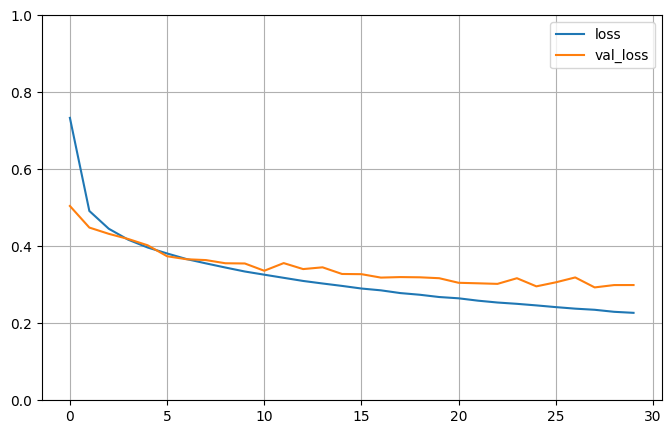

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(y=[0,2],figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # vertikalen Bereich auf [0-1]setzen
plt.show()

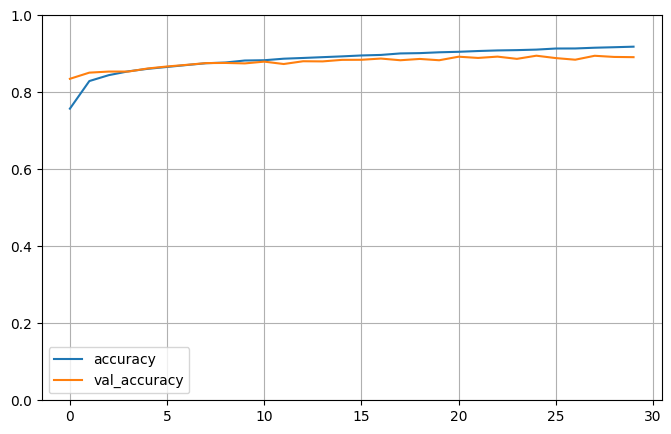

In [ ]:
pd.DataFrame(history.history).plot(y=[1,3],figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # vertikalen Bereich auf [0-1]setzen
plt.show()

In [ ]:
 model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.8820


[0.32936277985572815, 0.8820000290870667]

In [ ]:
X_new = X_test[:3]
print(X_new.shape)

(3, 28, 28)


In [ ]:
y_pred_probabilities = model.predict(X_new)
y_pred_classes = y_pred_probabilities.argmax(axis=-1)


1/1 [==============================] - 0s 73ms/step


In [ ]:
y_pred_classes



array([9, 2, 1])

In [ ]:
y_new = y_test[:3]

In [ ]:
 y_new


array([9, 2, 1], dtype=uint8)

In [ ]:
import cv2
import numpy as np

# Bild laden
img_link='/content/drive/MyDrive/Colab Notebooks/Veste-Transparentes-PNG-De-Fichier-1174927565.png'
image = cv2.imread(img_link)

# Bild in Graustufen konvertieren (falls es noch nicht graustufig ist)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Bild auf 28x28 skalieren
resized_image = cv2.resize(gray_image, (28, 28))

# Bild in ein numpy Array konvertieren
array = np.array(resized_image)

# Optional: Normalisierung der Pixelwerte zwischen 0 und 1
normalized_array = array / 255.0

# Überprüfen, ob das Array die gewünschte Größe hat
print(normalized_array.shape)

# Das Bild in die erwartete Form bringen (1, 28, 28)
input_image = normalized_array.reshape(1, 28, 28)

# Überprüfen der Form des Eingabe-Arrays
print(input_image.shape)


(28, 28)
(1, 28, 28)


In [ ]:
y_pred_probabilities = model.predict(input_image)
y_pred_classes = y_pred_probabilities.argmax(axis=-1)

1/1 [==============================] - 0s 50ms/step


In [ ]:
y_pred_classes

array([4])

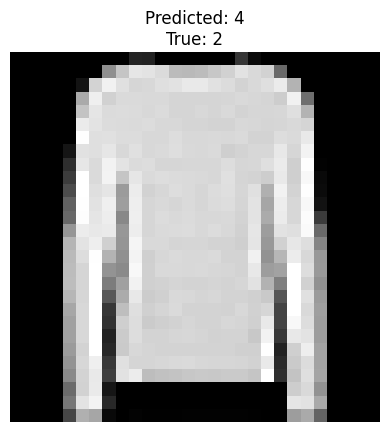

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Lade den Fashion-MNIST-Datensatz
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Annahme: y_pred_classes enthält die vorhergesagte Klasse für ein Bild
# Annahme: index ist der Index des Testbildes, für das die Vorhersage gemacht wurde

# Wähle ein zufälliges Testbild aus
index = np.random.randint(len(test_images))

# Vorhersageklasse
predicted_class = y_pred_classes[0]

# Tatsächliche Klasse
true_class = test_labels[index]

# Zeige das Bild und den Klassennamen an
plt.imshow(test_images[index], cmap='gray')
plt.title(f'Predicted: {predicted_class}\nTrue: {true_class}')
plt.axis('off')
plt.show()


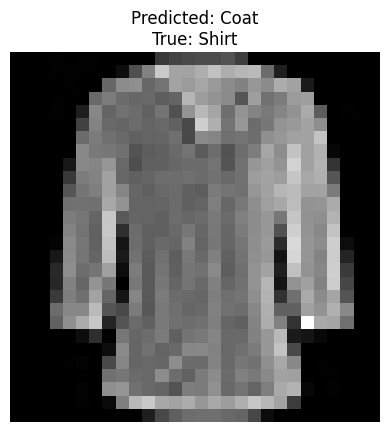

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Klassennamen für den Fashion-MNIST-Datensatz
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Annahme: y_pred_classes enthält die vorhergesagte Klasse für ein Bild
# Annahme: index ist der Index des Testbildes, für das die Vorhersage gemacht wurde

# Wähle ein zufälliges Testbild aus
index = 4

# Vorhersageklasse
predicted_class = y_pred_classes[0]

# Tatsächliche Klasse
true_class = test_labels[index]

# Zeige das Bild, den Namen der vorhergesagten Klasse und den Namen der tatsächlichen Klasse an
plt.imshow(test_images[index], cmap='gray')
plt.title(f'Predicted: {class_names[predicted_class]}\nTrue: {class_names[true_class]}')
plt.axis('off')
plt.show()


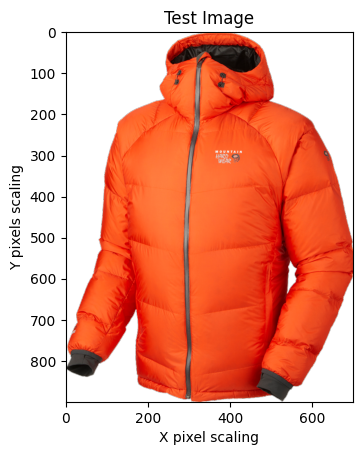

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

plt.title("Test Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

image = mpimg.imread(img_link)
plt.imshow(image)
plt.show()